# 学习Pandas，第 2 课
> 英文原文: [02 - Lesson](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb)

**创建数据** - 我们从创建自己的数据开始做数据分析。 这避免了阅读这个教程的用户需要去下载任何文件来重现结果。我们将会把这些数据导出到一个文本文件中这样你就可以试着从这个文件中去读取数据。  
**获取数据** - 我们将学习如何从文本文件中读取数据。 这些数据包含了1880年出生的婴儿数以及他们使用的名字。  
**准备数据** - 这里我们将简单看一下数据并确保数据是干净的，就是说我们将看一下文件中的数据并寻找一些可能异常的数据。 这可能包括了数据缺失(missing data)，数据不一致(inconsistant)，或者在正常范围之外(out of place)。 如果有这样的数据，我们将决定如何处置这些数据。  
**分析数据** - 我们将简单地找出一个给定年份中最热门的名字。  
**表现数据** - 通过表格和图形，向用户清晰地展示在一个给定的年份中最热门的名字。  


***注意:  确保你已经看过了之前的课程，这里的一些练习会需要你在之前课程学到的那些知识。***  
    

> ***Numpy*** 将被用来生成一些样例数据。 我们开始课程的第一步是导入这些库。

In [1]:
# 导入所有需要的库
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #导入sys库只是为了确认一下Python的版本
import matplotlib #这样导入matplotlib只是为了显示一下其版本号

# 初始化matplotlib，用inline方式显示图形
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.1 | packaged by conda-forge | (default, Mar 23 2017, 21:57:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.19.2
Matplotlib version 2.0.2


# 创建数据

我们用到的数据集将包括在1880年出生的，1,000个婴儿姓名以及对应的出生数量。 我们将会增加一些重复值因此你会看到相同的婴儿名字重复了多次。你可以设想同一个婴儿名字重复多次是因为不同的医院针对同一个婴儿名字上报的不同的出生数量。 因此，如果两家医院对“Bob”这个名字上报出生数量，就会有两个数值。 我们先开始创建一组随机的数值。

In [3]:
# 婴儿名字的初始值
names = ['Bob','Jessica','Mary','John','Mel']

使用上面的5个名字来创建一个有1,000个婴儿名字的随机列表，我们要做如下一些操作:

* 生成一个 0 到 4 之间的随机数  

我们会用到 ***seed***，***randint***, ***len***, ***range*** 和 ***zip*** 这几个函数。 

In [4]:
# 这将确保随机样本是可以被重复生成的。
# 这也意味着生成的随机样本总是一样的。

random.seed?

In [5]:
random.randint?

In [6]:
len?

In [7]:
range?

In [8]:
zip?

**seed(500)** - 创建一个种子

**randint(low=0, high=len(names))** - 生成一个随机整数，介于 0 和 "names" 列表的长度之间。  

**names[n]** - 从 "names" 列表中选择索引值(index)为 n 的名字。

**for i in range(n)** - 循环直到 i 等于 n，即: 1,2,3,....n。  

**random_names** = 从 names 列表中选在一个随机名字并执行 n 次 (Select a random name from the name list and do this n times.)  

In [9]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# 显示前10个名字
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

生成介于 0 和 1000 之间的随机数

In [10]:
# 1880年，不同婴儿名字对应的出生数量
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

用 ***zip*** 函数把 ***names*** 和 ***births*** 这两个数据集合并在一起。

In [11]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

我们基本上完成了数据集的创建工作。 现在我们要用 ***pandas*** 库将这个数据集导出到一个 csv 文件中。

***df*** 是一个 ***DataFrame***对象。 你可以把这个对象理解为包含了 `BabyDataset` 的内容而格式非常象一个 sql 表格或者 Excel 的数据表。 让我们看看 ***df*** 中的内容。

In [12]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


将 dataframe 导出到一个 ***csv*** 文件中。 我们将导出文件命名为 ***births1880.csv***。 导出 csv 文件的函数是 ***to_csv***。 除非你指定了其他的文件目录，否则导出的文件将保存在和 notebook 文件相同的位置。

In [13]:
df.to_csv?

我们会使用的参数是 ***index*** 和 ***header***。 将这两个参数设置为 `False` 将会防止索引(index)和列名(header names)被导出到文件中。 你可以试着改变这两个参数值来更好的理解这两个参数的作用。

In [14]:
df.to_csv('births1880.txt', index=False, header=False)

## 获取数据

我们将使用 pandas 的 ***read_csv*** 函数从 csv 文件中获取数据。 我们先看看这个函数的帮助以及它需要什么参数。

In [15]:
pd.read_csv?

这个函数有很多的参数，但我们目前只需要文件的位置。

***注意:*** 取决于你把 notebook 保存在什么位置，你也许需要修改一下文件的位置。

In [16]:
Location = r'./births1880.txt'
df = pd.read_csv(Location)

注意字符串之前的 ***r*** 。 因为斜线(slash)是一个特殊字符，在字符串之前放置前导的 ***r*** 将会把整个字符串进行转义(escape)。

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


汇总信息:  

* 数据集里有 ***999*** 条记录
* 有一列 ***Mary*** 有 999 个值
* 有一列 ***968*** 有 999 个值
* 这***两***列, 一个是***numeric***(数字型), 另外一个是***non numeric***(非数字型)  

我们可以使用 ***head()*** 这个函数查看一下dataframe中的前 5 条记录。 你也可以传入一个数字 n 来查看 dataframe 中的前 n 条记录。

In [18]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


这里出现了一个问题。 ***read_csv*** 函数将 csv 文件中的第一行作为了每列的列名(head names)。 这明显不对，因为数据文件没有提供列名。

要修正这个错误，我们需要给 ***read_csv*** 函数传入 ***header*** 这个参数，并设置为 ***None*** (Python中 null 的意思)。

In [19]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


汇总信息:  

* 数据集里有 ***1000*** 条记录
* 有一列 ***0*** 有 1000 个值
* 有一列 ***1*** 有 1000 个值
* 这***两***列, 一个是***numeric***(数字型), 另外一个是***non numeric***(非数字型)  

让我们看一下这个 dataframe 的最后 5 条记录。

In [20]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


如果我们需要为每一列指定一个名字，我们可以传入另外一个参数 ***names***，同时去掉 ***header*** 这个参数。

In [21]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


你可以把数字 [0,1,2,3,4] 设想为 Excel 文件中的行标 (row number)。 在 pandas 中，这些是 ***索引 (index)*** 的一部分。 你可以把索引(index)理解为一个sql表中的主键(primary key)，但是索引(index)是可以重复的。

***[Names, Births]*** 是列名，和sql表或者Excel数据表中的列名(column header)是类似的。

> 现在可以把这个 csv 文件删除了。

In [22]:
import os
os.remove(Location)

## 准备数据

我们的数据包含了1880年出生的婴儿及其数量。 我们已经知道我们有1,000条记录而且没有缺失值(所有值都是非空 non-null 的)。 我们还可以验证一下 "Names" 列仅包含了5个唯一的名字。

我们可以使用 dataframe 的 ***unique*** 属性找出 "Names" 列的所有唯一的(unique)的记录。

In [23]:
# 方法 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [24]:
# 如果你想把这些值打印出来:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [25]:
# 方法 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


因为每一个婴儿名字对应有多个值，我们需要把这几个值汇总起来这样一个婴儿名字就只出现一次了。 这意味着 1,000 行将变成只有 5 行。 我们使用 ***groupby*** 函数来完成这个动作。

In [26]:
df.groupby?

In [27]:
# 创建一个 groupby 的对象
name = df.groupby('Names')

# 在 groupby 对象上执行求和(sum)的功能
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


## 分析数据

要找到最高出生率的婴儿名或者是最热门的婴儿名字，我们可以这么做。

* 将 dataframe 排序并且找到第一行
* 使用 ***max()*** 属性找到最大值

In [28]:
# 方法 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [29]:
# 方法 2:
df['Births'].max()

106817

## 表现数据

我们可以将 ***Births*** 这一列标记在图形上向用户展示数值最大的点。 对照数据表，用户就会有一个非常直观的画面 ***Bob*** 是这组数据中最热门的婴儿名字。

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


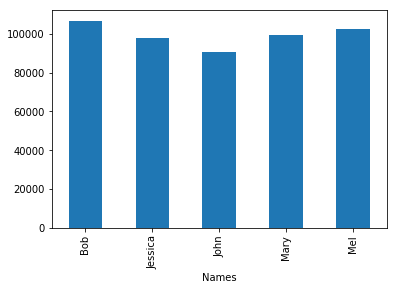

In [30]:
# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>
<p class="text-muted">本教程由<a href="http://datarx.cn" target="_blank"><strong>派兰数据</strong></a>翻译</p>